In [78]:
import numpy as np
import matplotlib.pyplot as plt
import sys
# Go up two levels to reach the folder containing alan_lib.py
sys.path.append("..")
from alan_lib import *

In [79]:
read_matrix = LinAlg.read_matrix

# Question1

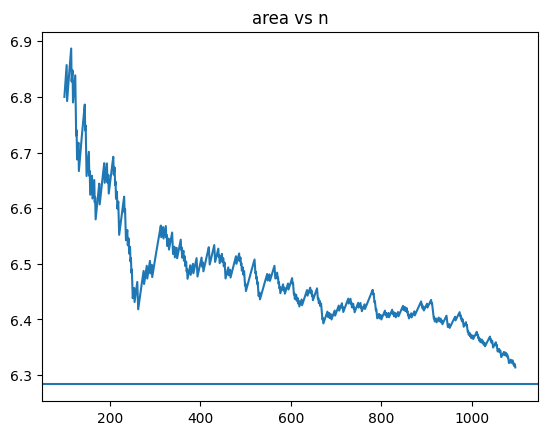

area = 6.313868613138686
error = 4.819722429447766
runs = 1096


In [80]:
a, b  =2, 1
def ellipse_area(seed1, seed2, N):
    inside_x = []
    x = lcg_rng(N, seed1 ,range=[0, 2])
    y = lcg_rng(N, seed2,range=[0, 1])
    for i, j in zip(x, y):
        if j < np.sqrt(1-(i/a)**2)*b and i < np.sqrt(1-(j/b)**2)*a :
            inside_x.append(i)

    pi_val = 8*len(inside_x)/(N)
    return pi_val

seed1, seed2 = 1, 2

n = 100

y = []
while True:
    area = ellipse_area(seed1, seed2, n)
    y.append(area)
    error  = abs(area - 2*np.pi)*100/2*np.pi
    if error <= 5:
        break
    else:
        n += 1 
x = [n for n in range(100, n+1)]

plt.plot(x, y)
plt.title('area vs n')
plt.axhline(2*np.pi)
plt.show()


print(f'area = {area}\nerror = {error}\nruns = {n}')

# Question2

In [81]:
root = 4.96511
b = 2.8977e-3

In [82]:
def f(x):
    return (x-5)*np.exp(x) + 5

def df(x):
    return (x-4)*np.exp(x)

root = Linsolve.newton_raphson(f, df, 10, 1e-4)
root

(np.float64(4.965114232019792), 11)

In [83]:
c = 3e8
k = 1.381e-23
h = 6.626e-34

b = h*c/(root[0]*k)
print('value of b: ', b)

value of b:  0.0028990103305774253


# Question 3

In [84]:
A = read_matrix('matLU.txt')

Ain = LinAlg.invert(A)

A = [[round(a, 3) for a in row] for row in Ain]
A

[[-0.708, 2.531, 2.431, 0.967, -3.902],
 [-0.193, 0.31, 0.279, 0.058, -0.294],
 [0.022, 0.365, 0.286, 0.051, -0.29],
 [0.273, -0.13, 0.132, -0.141, 0.449],
 [0.782, -2.875, -2.679, -0.701, 4.234]]

# Question 4

In [85]:
A = read_matrix('matA.txt')
b = read_matrix('vecB.txt')
b = [i[0] for i in b]
sol, count = LinAlg.Gauss_Seidel(A, b, 1e-6)
print(f'\nSolution using Gauss_Seidel in {count} iterations:\n', sol)


Solution using Gauss_Seidel in 13 iterations:
 [1.4999998297596437, -0.4999999999999992, 1.9999999999999998, -2.4999999148640373, 1.0000000000000004, -0.9999999999957907]
